<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/Hawaii_Soils_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.71


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=d3a7a7888dcd00234aaa5fd3644131d2&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQWpuZElSOEtQLVB5NGRmYURDdzVsWUFCUlJXUGlOcEN1emk4VGxmUGFtOVFidXNCLWF6bE9Pd2MwVlY0TmppUSIsInN0YXRlIjoiZDNhN2E3ODg4ZGNkMDAyMzRhYWE1ZmQzNjQ0MTMxZDIifQ==


In [24]:
# Updated: https://drive.google.com/file/d/1Ot_UZjxDlsYXKDoL3TSz_nOJnY8IT9JV/view?usp=drive_link
drive_download(as_id('1Ot_UZjxDlsYXKDoL3TSz_nOJnY8IT9JV'), path = paste0('/content/HI_combo.csv'), overwrite = TRUE)
HI_combo_dt <-  fread('/content/HI_combo.csv')  %>% data.table
HI_combo_dt <- HI_combo_dt[!is.na(latitude) & !is.na(longitude)]%>% st_as_sf(coords = c("longitude","latitude"), crs = 4326) %>% data.table


File downloaded:

• combined_soc_2024_04_05.csv <id: 1Ot_UZjxDlsYXKDoL3TSz_nOJnY8IT9JV>

Saved locally as:

• /content/HI_combo.csv



In [28]:
HI_combo_dt %>% st_as_sf %>% st_write('HI_combo.gpkg')

Writing layer `HI_combo' to data source `HI_combo.gpkg' using driver `GPKG'
Writing 6843 features with 12 fields and geometry type Point.


In [29]:
# HI_combo_dt %>% plot

ERROR: Error in data.matrix(x): 'list' object cannot be coerced to type 'double'


In [6]:
# https://drive.google.com/file/d/1DcBOzWHwqJovd9hhIqLUjRlc2kpqEGKz/view?usp=drive_link
drive_download(as_id('1DcBOzWHwqJovd9hhIqLUjRlc2kpqEGKz'), path = "/content/250_summary_grid_dt.gpkg", overwrite = TRUE)
grid_dt <- st_read("/content/250_summary_grid_dt.gpkg") %>% st_transform(4326) %>% data.table()

File downloaded:

• 250_summary_grid_dt.gpkg <id: 1DcBOzWHwqJovd9hhIqLUjRlc2kpqEGKz>

Saved locally as:

• /content/250_summary_grid_dt.gpkg



Reading layer `250_summary_grid_dt' from data source 
  `/content/250_summary_grid_dt.gpkg' using driver `GPKG'
Simple feature collection with 359163 features and 35 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7877 ymin: 18.91217 xmax: -154.807 ymax: 22.23237
Geodetic CRS:  WGS 84


In [ ]:
# grid_dt <- grid_dt[trees > 0.5 & !is.na(agbd_m) &!is.na(agbd_sd)& !is.na(aet)]

In [32]:
grid_dt$agbd_n <- grid_dt$agbd_n %>% as.numeric
grid_dt$agbd_sd <- grid_dt$agbd_sd %>% as.numeric
grid_dt$agbd_m <- grid_dt$agbd_m %>% as.numeric

In [45]:
HI_combo_dt <-  HI_combo_dt[depth_adj_bottom==20]

In [46]:
grid_int_dt  <- HI_combo_dt$geom %>% st_transform(4135) %>% st_buffer(10000) %>% st_transform(4326) %>% st_intersects(grid_dt$geom)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


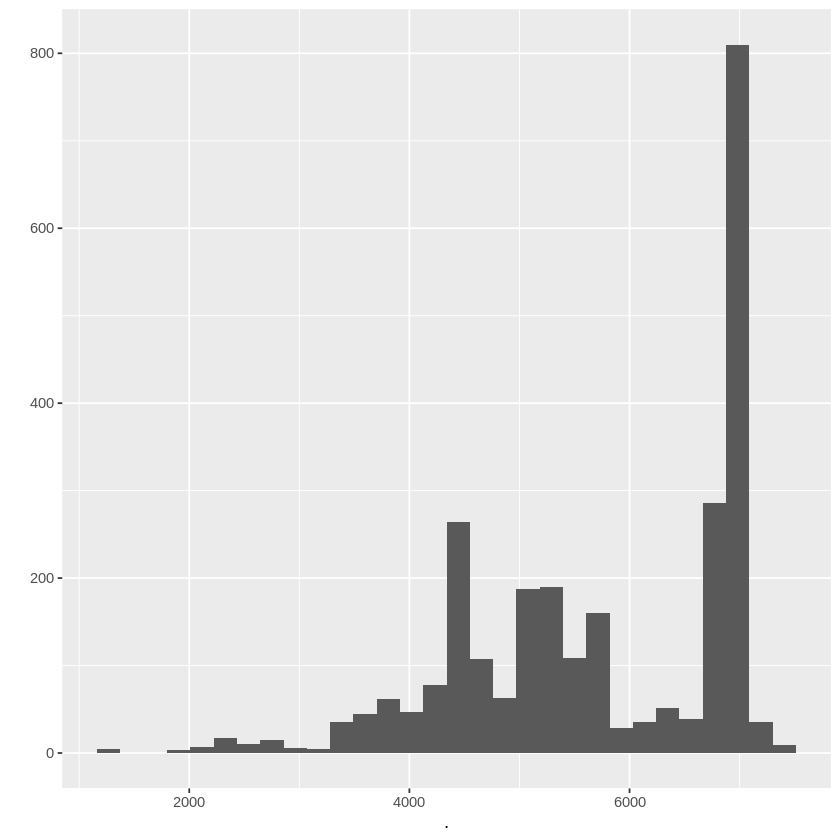

In [47]:
grid_int_dt %>% lapply(length) %>% unlist %>% qplot

In [48]:
rm_vec <- (grid_int_dt %>% lapply(length) %>% unlist) > 0
grid_int_dt <- grid_int_dt[rm_vec]
HI_combo_dt <- HI_combo_dt[rm_vec,]

In [49]:
names(grid_dt)

[1] "id"                 "left"               "top"               
 [4] "right"              "bottom"             "water"             
 [7] "trees"              "grass"              "flooded_vegetation"
[10] "crops"              "shrub_and_scrub"    "built"             
[13] "bare"               "snow_and_ice"       "elevation"         
[16] "landform"           "SRTM_mTPI"          "aet"               
[19] "def"                "pdsi"               "pet"               
[22] "pr"                 "ro"                 "soil"              
[25] "srad"               "swe"                "tmmn"              
[28] "tmmx"               "vap"                "vpd"               
[31] "vs"                 "agbd_m"             "agbd_sd"           
[34] "agbd_n"             "geom"               "age_years"         
[37] "majorcomposition"   "Age_Class"

In [50]:
grid_dt$age_years[grid_dt$age_years %>% is.na ] <- -2
grid_dt$age_class[grid_dt$age_class %>% is.na ] <- 'Unknown'

In [51]:
grid_dt %>% names

[1] "id"                 "left"               "top"               
 [4] "right"              "bottom"             "water"             
 [7] "trees"              "grass"              "flooded_vegetation"
[10] "crops"              "shrub_and_scrub"    "built"             
[13] "bare"               "snow_and_ice"       "elevation"         
[16] "landform"           "SRTM_mTPI"          "aet"               
[19] "def"                "pdsi"               "pet"               
[22] "pr"                 "ro"                 "soil"              
[25] "srad"               "swe"                "tmmn"              
[28] "tmmx"               "vap"                "vpd"               
[31] "vs"                 "agbd_m"             "agbd_sd"           
[34] "agbd_n"             "geom"               "age_years"         
[37] "majorcomposition"   "Age_Class"          "age_class"

In [52]:
grid_dt$age_class %>%  is.na %>% table

.
  TRUE 
359163 

In [53]:
grid_dt$age_class <- NULL

In [78]:
grid_dt$max <- NULL

grid_dt$landform <- grid_dt$landform  %>% as.character
grid_dt$majorcomposition <- grid_dt$majorcomposition  %>% as.character
grid_dt$Age_Class <- grid_dt$Age_Class  %>% as.character

grid_dt$landform[is.na(grid_dt$landform)] <-'Unknown'
grid_dt$majorcomposition[is.na(grid_dt$majorcomposition)] <-'Unknown'
grid_dt$Age_Class[is.na(grid_dt$Age_Class)] <-'Unknown'

grid_dt$landform <-  grid_dt$landform %>% factor
grid_dt$majorcomposition <- grid_dt$majorcomposition %>% factor
grid_dt$Age_Class <- grid_dt$Age_Class %>% factor
grid_dt <- grid_dt %>% st_as_sf %>% data.table

Warning message in set(x, j = name, value = value):
“Column 'max' does not exist to remove”


In [ ]:
# fia_dt$DEPTH_UPPER <- fia_dt$LAYER_TYPE %>% gsub('MINERAL_SOIL_','',.) %>% gsub('_CM','',.) %>% strsplit('_') %>% lapply(function(x){x[1]}) %>% unlist %>% as.numeric
# fia_dt$DEPTH_LOWER <- fia_dt$LAYER_TYPE %>% gsub('MINERAL_SOIL_','',.) %>% gsub('_CM','',.) %>% strsplit('_') %>% lapply(function(x){x[2]}) %>% unlist %>% as.numeric

In [ ]:
# fia_dt$DEPTH_LOWER %>% is.na() %>% table
# fia_dt$DEPTH_UPPER %>% is.na() %>% table

In [402]:
leave_out_vec <- sample(1:nrow(HI_combo_dt),300)

In [450]:
retain_dt <- data.table(HI_combo_dt[0,], grid_dt[0,],sample = 'retain')[0,]

In [451]:
xval_out_dt <- HI_combo_dt[0,]
xval_dt <- HI_combo_dt[leave_out_vec,]

In [410]:
xval_dt %>% names

[1] "source_dataset"   "island"           "soil_column_id"   "unique_id"       
 [5] "depth_top"        "depth_bottom"     "depth_adj_bottom" "c_perc"          
 [9] "imp_c"            "bulk_density"     "imp_bd"           "hole_id"

In [ ]:
for(i in 1:300){
grid_int_dt_split <- grid_int_dt %>% split(HI_combo_dt$soil_column_id)

sample_vec <- grid_int_dt_split %>% lapply(function(x){sample(x[[1]],1) %>% rep(length(x))}) %>% unlist %>% as.numeric

rf_dt <- data.table(HI_combo_dt[-leave_out_vec,], grid_dt[sample_vec,][-leave_out_vec,],sample = 'new')

rf_dt <- rbindlist(list(rf_dt,retain_dt),fill=T)

x_var <- (grid_dt %>% names)[-c(1:5,ncol(grid_dt))]

rf_form <- as.formula(paste0('imp_c~',paste(x_var,collapse = '+')))

rf_dt <-  rf_dt[complete.cases(rf_dt[,x_var,with=F]),]

rf_dt <-  rf_dt[!is.na(imp_c),]

x_var <- (grid_dt %>% names)[-c(1:5,ncol(grid_dt))]

rf_form <- as.formula(paste0('imp_c~',paste(x_var,collapse = '+')))

rf_terra <- randomForest(rf_form,rf_dt,verbose=T)

rf_imp_dt <- rf_terra$importance %>% t %>% data.table

names(rf_imp_dt) <-paste0('var_imp_',names(rf_imp_dt))

rf_dt$predicted <-  NULL

out_dt <- data.table(rf_dt,data.table(predicted = rf_terra$predicted))

out_dt[,rmse_p:= sqrt((predicted-imp_c)^2)/imp_c,by=1:nrow(out_dt)]

print(out_dt[,list(rmse_p = mean(rmse_p,na.rm=T)),by=sample])

add_dt <- out_dt[rmse_p < 0.01 &sample== 'new']

# retain_dt <- rbindlist(list(add_dt[0,],add_dt),fill=T)
retain_dt <- rbindlist(list(retain_dt,add_dt),fill=T)

retain_dt$sample <- 'retained'

retain_dt$run_id <- i

predict_xval_dt <-data.table(xval_dt, grid_dt[sample_vec,][leave_out_vec,],sample = 'original')
predict_xval_dt$predicted <- predict(rf_terra,predict_xval_dt) %>% unlist
predict_xval_dt$run_id <- i
xval_out_dt <- rbindlist(list(xval_out_dt,predict_xval_dt),fill=T)

print(rf_terra)
retain_dt %>% nrow
}

Warning message in set(x, j = name, value = value):
“Column 'predicted' does not exist to remove”


In [437]:
xval_out_dt %>% names

[1] "source_dataset"     "island"             "soil_column_id"    
 [4] "unique_id"          "depth_top"          "depth_bottom"      
 [7] "depth_adj_bottom"   "c_perc"             "imp_c"             
[10] "bulk_density"       "imp_bd"             "hole_id"           
[13] "id"                 "left"               "top"               
[16] "right"              "bottom"             "water"             
[19] "trees"              "grass"              "flooded_vegetation"
[22] "crops"              "shrub_and_scrub"    "built"             
[25] "bare"               "snow_and_ice"       "elevation"         
[28] "landform"           "SRTM_mTPI"          "aet"               
[31] "def"                "pdsi"               "pet"               
[34] "pr"                 "ro"                 "soil"              
[37] "srad"               "swe"                "tmmn"              
[40] "tmmx"               "vap"                "vpd"               
[43] "vs"                 "agbd_m"             "agbd_sd"           
[46] "agbd_n"             "age_years"          "majorcomposition"  
[49] "Age_Class"          "sample"             "predicted"         
[52] "run_id"

Warning message in log((imp_c - predicted)/imp_c):
“NaNs produced”
Warning message in log((imp_c - predicted)/imp_c):
“NaNs produced”
Warning message in log((imp_c - predicted)/imp_c):
“NaNs produced”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 12530 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12530 rows containing missing values (`geom_point()`).”


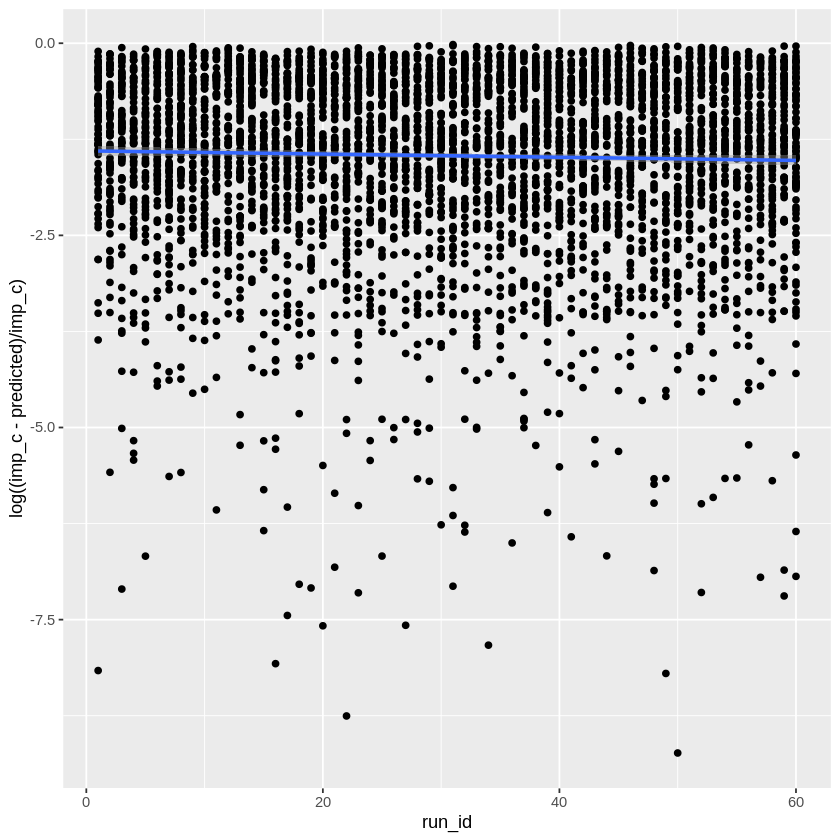

In [449]:
xval_out_dt[,list(predicted = mean(predicted,na.rm=T),imp_c = mean(imp_c,na.rm=T)),by = .(run_id,soil_column_id)] %>%
  ggplot(aes(x=run_id,y=log((imp_c-predicted)/imp_c)))+
  geom_point(aes())+
  geom_smooth(aes(),method='lm' )

In [375]:
retain_dt$soil_column_id %>%table %>% unlist %>% table

.
  1   2   3   4   5   6   7   8   9  10  12  13  14  17  18  19  22  24  28  29 
196 103  59  31  14  17  10   9   3   2   3   2   1   1   1   2   1   1   1   1 
 30  36  38  39  49 
  1   1   1   1   1 

In [342]:
rf_dt$sample %>% table

.
     new retained 
    2144       60 

In [291]:
# rf_dt <-  rf_dt[complete.cases(rf_dt[,x_var,with=F]),]
# rf_dt <-  rf_dt[!is.na(imp_c),]

In [344]:
rf_terra <- randomForest(rf_form,rf_dt,verbose=T)

In [331]:
# out_dt

In [335]:
# add_dt

[1] 88

[1] 2161


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! `data` must be uniquely named but has duplicate columns

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if 

[1] 0

Call:
 randomForest(formula = rf_form, data = rf_dt, verbose = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 46.09931
                    % Var explained: 18.14
[1] 28


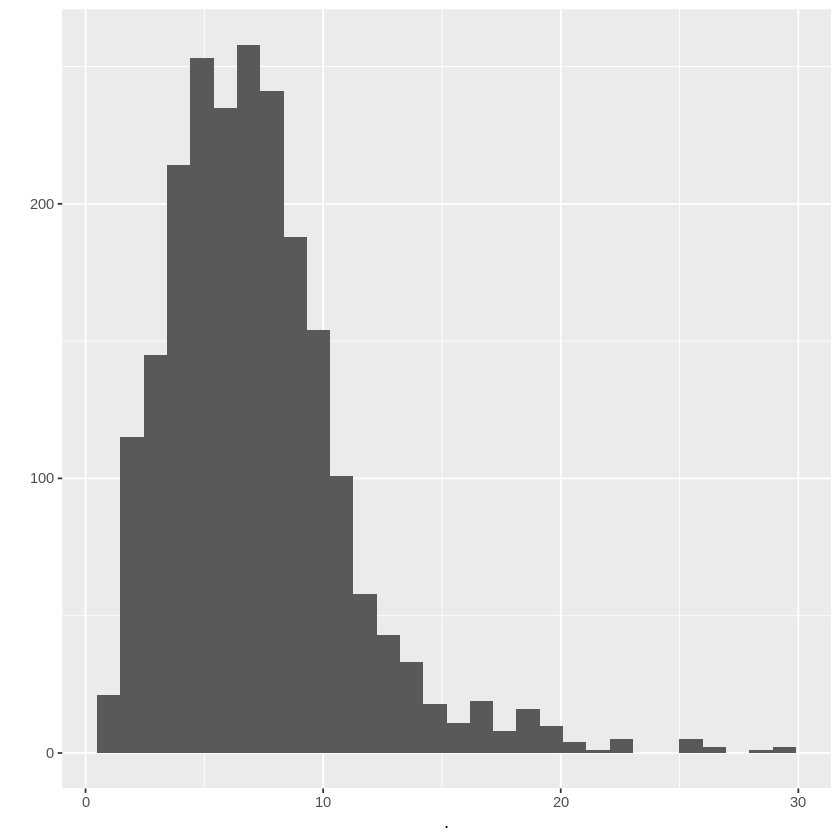

In [234]:


add_dt <- out_dt[rmse_p < 0.01 &sample== 'new']
print(nrow(add_dt))
retain_dt$sample <- 'retained'
print(rf_terra)
retain_dt %>% nrow %>% print
# }

In [231]:
retain_dt$soil_column_id %>% table

.
FIA_4695 HISOC125 HISOC176 HISOC217  HISOC24 HISOC272 HISOC318 HISOC337 
       1        1        1        1        1        1        1        1 
HISOC358 HISOC453 HISOC471 HISOC475 HISOC532 HISOC543 HISOC550  SH11-01 
       1        1        1        1        1        1        1        1 
SH229-01 SH238-01 SH286-01 SH295-01 SH307-01 SH343-01 SH349-01 SH367-01 
       1        1        1        1        1        1        1        1 
SH379-01 SH397-01 SH589-01 SH735-01 
       1        1        1        1 

In [227]:
# retain_dt$soil_column_id %>% table

In [104]:
HI_combo_dt %>% nrow

[1] 2710

In [129]:
retain_dt %>% nrow

[1] 84

In [128]:
add_dt <- out_dt[rmse_p < 0.01]
retain_dt <- rbindlist(list(retain_dt,add_dt),fill=T)

In [ ]:
# for( i in 1:30){
cl <-makeCluster(8)
sim_dt <-
1:1000 %>% parLapply(cl,.,function(m,fia_dt,grid_dt,grid_int_dt){
  library(sf)
  library(magrittr)
  library(data.table)
  library(raster)
  library(exactextractr)
  library(terra)
  library(randomForest)

  grid_int_dt_split <- grid_int_dt %>% split(fia_dt$PLOT)

  sample_vec <- grid_int_dt_split %>% lapply(function(x){sample(x[[1]],1) %>% rep(length(x))}) %>% unlist %>% as.numeric

  rf_dt <- data.table(fia_dt[,c('PLOT','SOC_Mg_Ha','DEPTH_UPPER','DEPTH_LOWER','county_name')], grid_dt[sample_vec,])

  x_var <- c('DEPTH_UPPER','DEPTH_LOWER',(rf_dt %>% names)[-c(1,2,3,4,5,6,7,8,9,10,ncol(rf_dt) )])
  # print(x_var)
  rf_form <- as.formula(paste0('SOC_Mg_Ha~',paste(x_var,collapse = '+')))

  rf_dt <-  rf_dt[complete.cases(rf_dt[,-c(ncol(rf_dt)),with=F]),]
  rf_dt <-  rf_dt[!is.na(SOC_Mg_Ha),]

  # print(nrows(rf_dt))
  rf_terra <- randomForest(rf_form,rf_dt,verbose=T)

  rf_imp_dt <- rf_terra$importance %>% t %>% data.table

  names(rf_imp_dt) <-paste0('var_imp_',names(rf_imp_dt))

  out_dt <- data.table(rf_dt,data.table(predicted = rf_terra$predicted),rf_imp_dt[rep(1,nrow(rf_dt)),])



  out_dt$r2_depth <- rf_terra$rsq[500]

  out_dt$r2_plot <-(lm(SOC_Mg_Ha~predicted,out_dt[,list(SOC_Mg_Ha = sum(SOC_Mg_Ha),predicted = sum(predicted)),by=PLOT]) %>% summary())$r.squared

  return(out_dt[county_name %in% 'Hawaii'])
  },fia_dt,grid_dt,grid_int_dt) %>%
  rbindlist
stopCluster(cl)

# sim_dt %>% st_write(paste0("/content/sim_results_Hawaii_10000m_Run",i,".gpkg"), append=FALSE)

# drive_upload(paste0("/content/sim_results_Hawaii_10000m_Run",i,".gpkg"), path = as_id("1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM"))
# }

In [ ]:
sim_dt %>% head

In [ ]:
# Write to GeoPackage
sim_dt %>% st_write("/content/sim_results_Hawaii_10000m_Run1.gpkg", append=FALSE)

In [ ]:
# https://drive.google.com/drive/folders/1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM?usp=drive_link
drive_upload("/content/sim_results_Hawaii_10000m_Run1.gpkg", path = as_id("1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM"))

In [ ]:
# sim_dt

In [ ]:
sim_dt %>%
  ggplot(aes(y=SOC_Mg_Ha,x=predicted))+
    geom_bin2d() +
    geom_abline()+
    geom_smooth(method = 'lm')